In [1]:
from datetime import datetime
import time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingDownstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print(f"Number of rows: {len(df1)}")
print(f"Number of columns: {len(df1.columns)}")

print("\nData from", file_name)
print(df1)

Number of rows: 2089
Number of columns: 14

Data from WalkingDownstairs.csv
      ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                     1.6543                 -1.7183                 10.3140   
1                     2.9031                 -3.8800                  0.2910   
2                    -0.3218                 -6.8955                 -0.7074   
3                     5.8502                -10.3286                  0.2695   
4                     4.5742                -10.4818                 -3.6832   
...                      ...                     ...                     ...   
2084                 -0.4930                  0.8620                  7.8960   
2085                 -2.3180                  2.1330                  8.5070   
2086                  0.0960                  1.8650                  8.7240   
2087                  0.8760                  1.8960                  9.3450   
2088                 -3.3570                

In [3]:
print(df1.columns)

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
       'Time since start in ms ', 'YYYY-MO-DD HH-MI-SS_SSS'],
      dtype='object')


Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2089.000000             2089.000000             2089.000000   
mean                -1.156543               -0.052501               -1.208981   
std                  5.064221                9.714855                3.990228   
min                -24.248000              -26.057800              -27.822800   
25%                 -3.419900               -8.717

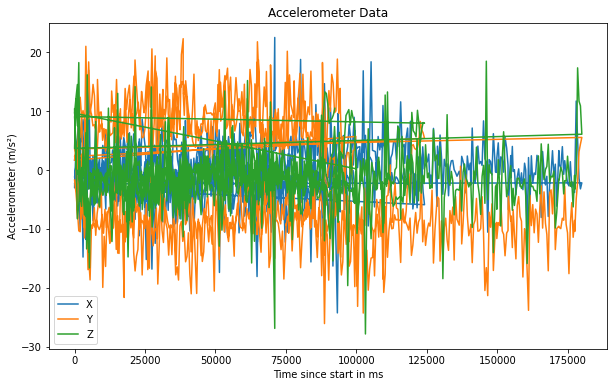

In [4]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingDownstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

plt.figure(figsize=(10, 6))
plt.plot(df1['Time since start in ms '], df1['ACCELEROMETER X (m/s²)'], label='X')
plt.plot(df1['Time since start in ms '], df1['ACCELEROMETER Y (m/s²)'], label='Y')
plt.plot(df1['Time since start in ms '], df1['ACCELEROMETER Z (m/s²)'], label='Z')
plt.xlabel('Time since start in ms')
plt.ylabel('Accelerometer (m/s²)')
plt.title('Accelerometer Data')
plt.legend()
plt.show()

In [5]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingDownstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').values.astype(np.int64) // 1000

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
Timestamp (microseconds)        0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2089.000000             2089.000000             2089.000000   
mean                -1.156543               -0.052501               -1.208981   
std                  5.064221                9.714855                3.990228   
min                -24.248000              -26.057800              -27.822800   
25%                 -3.419900               -8.717

In [6]:
pd.Timestamp(df1['Timestamp (microseconds)'][0], unit='us')

Timestamp('2021-05-19 17:34:25.292000')

In [7]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'WalkingDownstairs.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Original DataFrame:")
print(df1.head())

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000

print("\nDataFrame with converted timestamps:")
print(df1[['YYYY-MO-DD HH-MI-SS_SSS', 'Timestamp (microseconds)']].head())

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

start = pd.Timestamp(year=2021, month=2, day=19, hour=23, minute=34, second=25, microsecond=292000)
start_ts = int(start.timestamp() * 1e6)

end = pd.Timestamp(year=2021, month=5, day=19, hour=23, minute=35, second=27, microsecond=728000)
end_ts = int(end.timestamp() * 1e6)

DF1 = df1.loc[(df1['Timestamp (microseconds)'] >= start_ts) & (df1['Timestamp (microseconds)'] <= end_ts)]

DF1['Activity_Label'] = 'Walking Downstairs'

DF1 = DF1[['Timestamp (microseconds)', 'ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 'Activity_Label']]
DF1 = DF1.rename(columns={
    'ACCELEROMETER X (m/s²)': 'Accel X (g)',
    'ACCELEROMETER Y (m/s²)': 'Accel Y (g)',
    'ACCELEROMETER Z (m/s²)': 'Accel Z (g)'
})

DF1.reset_index(drop=True, inplace=True)

print("\nFiltered DataFrame with index column:")
print(DF1)

Original DataFrame:
   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                  1.6543                 -1.7183                 10.3140   
1                  2.9031                 -3.8800                  0.2910   
2                 -0.3218                 -6.8955                 -0.7074   
3                  5.8502                -10.3286                  0.2695   
4                  4.5742                -10.4818                 -3.6832   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0           -0.9243            0.0837            9.7626   
1            9.6904           -1.3627           -0.6395   
2            6.9068           -6.5984           -2.2199   
3            5.3605           -8.1593           -0.9279   
4            4.1918           -8.0531           -3.7077   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                       -1.2650                       -0.5804   
1                       -3.6426 

/tmp/ipykernel_8055/2123977860.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000


In [8]:
output_file_path = "Final_Cleaned_WalkingDownstairs_Accel.csv"
DF1.to_csv(output_file_path, index=False)

print(f"Filtered DataFrame saved to {output_file_path}")

Filtered DataFrame saved to Final_Cleaned_WalkingDownstairs_Accel.csv


In [9]:
filtered_df = pd.read_csv("Final_Cleaned_WalkingDownstairs_Accel.csv")

filtered_df.reset_index(drop=True, inplace=True)

print("\nLoaded DataFrame with numerical index and Timestamp (microseconds):")
print(filtered_df)


Loaded DataFrame with numerical index and Timestamp (microseconds):
      Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0             1621445665292000       1.6543      -1.7183      10.3140   
1             1621445665792000       2.9031      -3.8800       0.2910   
2             1621445666292000      -0.3218      -6.8955      -0.7074   
3             1621445666792000       5.8502     -10.3286       0.2695   
4             1621445667292000       4.5742     -10.4818      -3.6832   
...                        ...          ...          ...          ...   
2084          1621445755727000      -0.4930       0.8620       7.8960   
2085          1621445756228000      -2.3180       2.1330       8.5070   
2086          1621445756728000       0.0960       1.8650       8.7240   
2087          1621445757227000       0.8760       1.8960       9.3450   
2088          1621445757728000      -3.3570       2.1620      10.4510   

          Activity_Label  
0     Walking Downstairs  
